# Ej1

# 1.a

Una red de 2 neuronas con sus conexiones y pesos, donde E es la neurona exitatoria e I la inhibitoria. El peso de E hacia I vale a siendo a > 0, ya que E es exitatoria y el peso de I a E vale -a, debido a que se pedia que ambas tengan el mismo peso pero I es inhibitoria 
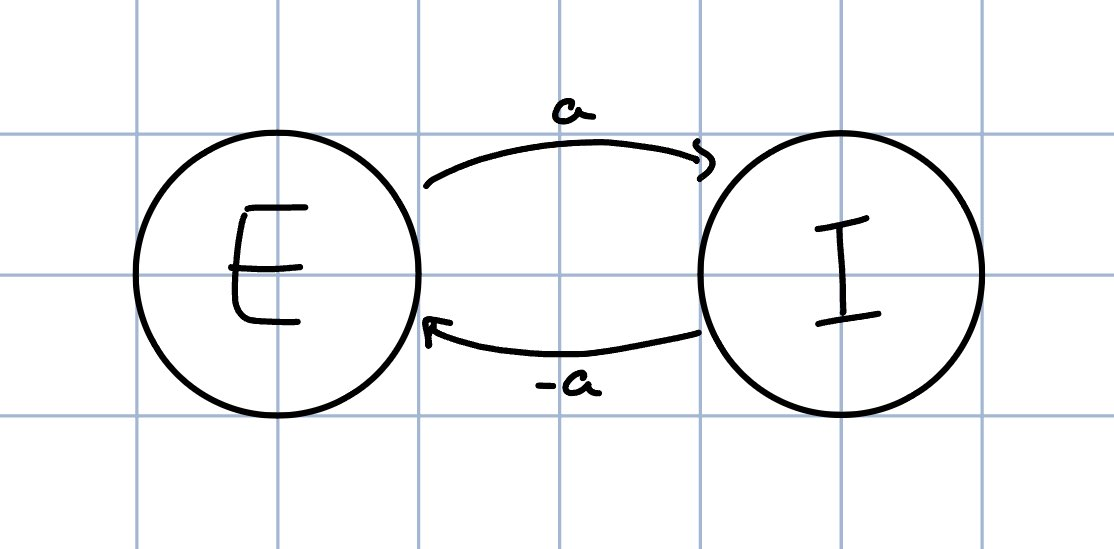